# Customer Conversion Prediction

### We have historical data of telephonic calls details, and our motive is to build a ML Model that will predict if a client will subscribe to the insurance.

#### Features are,
● age (numeric) <br>
● job : type of job <br>
● marital : marital status <br>
● educational_qual : education status <br>
● call_type : contact communication type <br>
● day: last contact day of the month (numeric) <br>
● mon: last contact month of year <br>
● dur: last contact duration, in seconds (numeric) <br>
● num_calls: number of contacts performed during this campaign and for this client <br>
● prev_outcome: outcome of the previous marketing campaign (categorical:"unknown","other","failure","success") <br>
#### Output variable (desired target):
● y - has the client subscribed to the insurance?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#Model Validation
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/MilanvictorV/MyDataScienceProjects/main/ML_Models/Customer_conversion_prediction/Customer_Conversion_Prediction.csv')
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [3]:
df.shape

(45211, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [5]:
df.isna().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

# Analysis

In [6]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


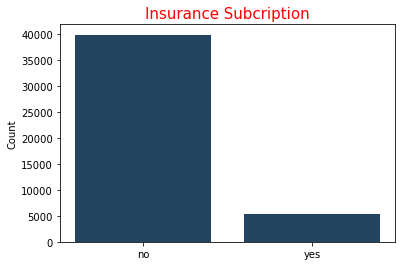

In [7]:
overall_count = df.groupby('y').count()
plt.bar(overall_count.index, height = overall_count['age'], color = '#234561')
plt.title('Insurance Subcription', color = 'r', fontsize = 15)
plt.ylabel('Count')

plt.show()

In [8]:
df_yes = df[df['y'] == 'yes']
df_no = df[df['y'] == 'no']

In [9]:
age_yes = df_yes.groupby('age').count()
age_no = df_no.groupby('age').count()

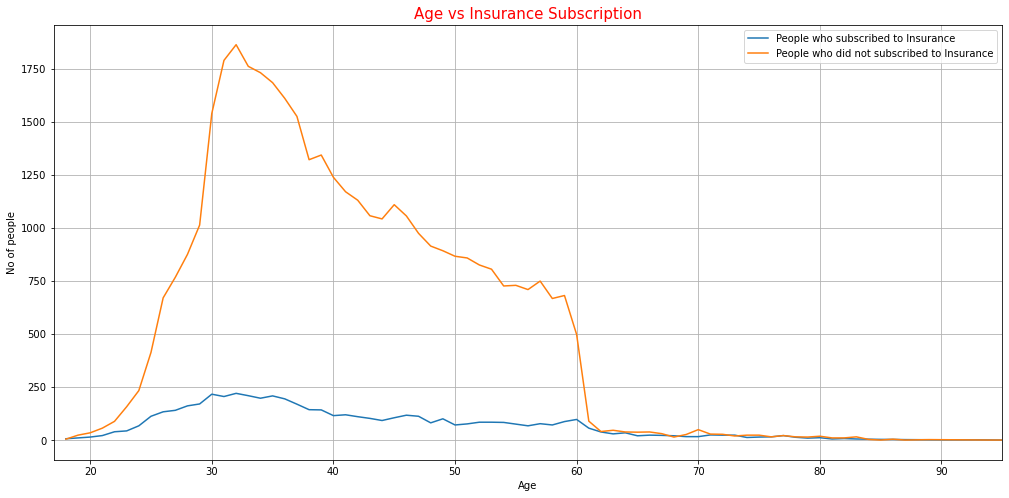

In [10]:
plt.figure(figsize = (17,8))

plt.plot(age_yes.index, age_yes['job'], label = 'People who subscribed to Insurance')
plt.plot(age_no.index, age_no['job'], label = 'People who did not subscribed to Insurance')
plt.title('Age vs Insurance Subscription', color = 'r', fontsize = 15)
plt.xlabel('Age')
plt.ylabel('No of people')
plt.legend()
plt.grid()
plt.xlim(17, 95)

plt.show()

In [11]:
job_yes = df_yes.groupby('job').count()
job_no = df_no.groupby('job').count()

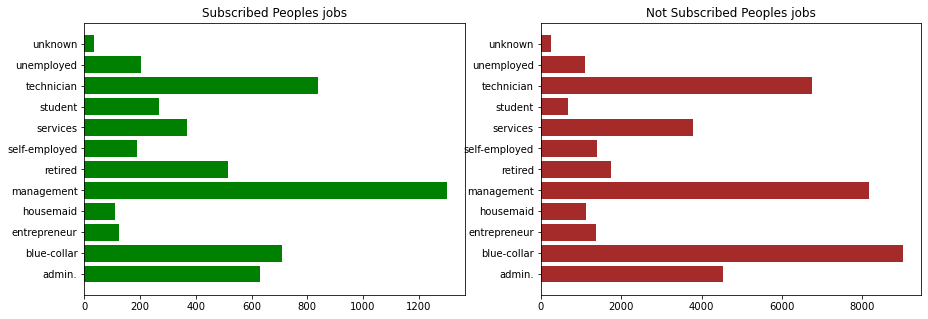

In [12]:
fig , (ax,ax1) = plt.subplots(1,2,figsize=(15,5))

ax.barh(job_yes.index, width = job_yes['age'], color = 'g')
ax.set_title('Subscribed Peoples jobs')

ax1.barh(job_no.index, width = job_no['age'], color = 'brown')
ax1.set_title('Not Subscribed Peoples jobs')


plt.show()

In [13]:
married_yes = df_yes.groupby('marital').count()
married_no = df_no.groupby('marital').count()

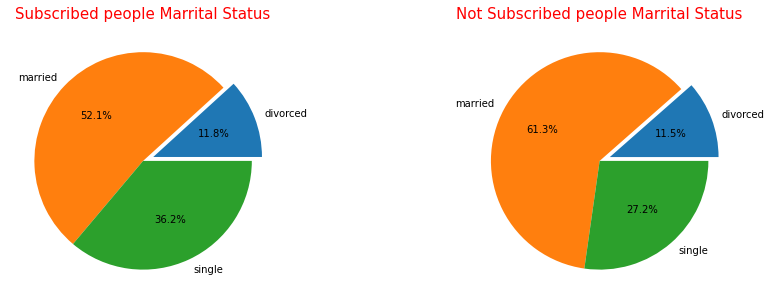

In [14]:
fig, (ax, ax1) = plt.subplots(1, 2, figsize = (15,5))

ax.pie(married_yes['age'], labels = married_yes.index, explode = [0.1,0,0], autopct = '%0.1f%%')
ax.set_title('Subscribed people Marrital Status', color = 'r', fontsize = 15)

ax1.pie(married_no['age'], labels = married_no.index, explode = [0.1,0,0], autopct = '%0.1f%%')
ax1.set_title('Not Subscribed people Marrital Status', color = 'r', fontsize = 15)

plt.show()

In [15]:
edu_yes = df_yes.groupby('education_qual').count()
edu_no = df_no.groupby('education_qual').count()

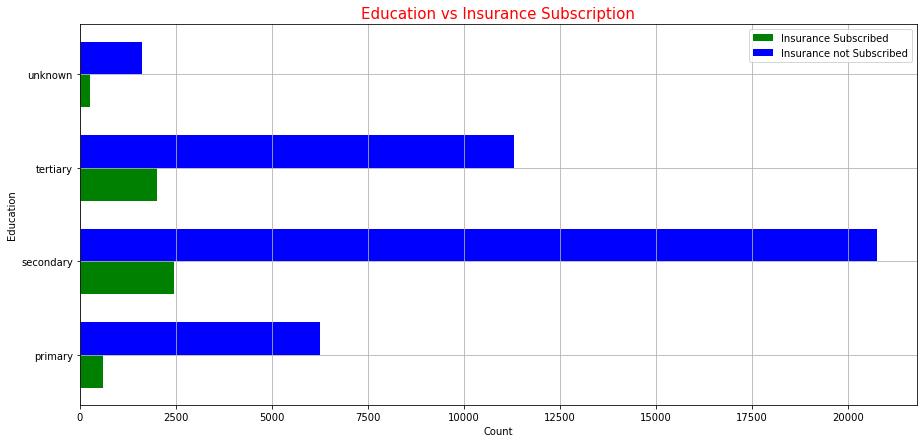

In [16]:
bar_width = 0.35
bar_positions1 = np.arange(len(edu_yes))
bar_positions2 = bar_positions1 + bar_width

fig, ax = plt.subplots(figsize = (15,7))
ax.barh(bar_positions1, edu_yes['age'], height = bar_width, label='Insurance Subscribed', color = 'g')
ax.barh(bar_positions2, edu_no['age'], height = bar_width, label='Insurance not Subscribed', color = 'b')
ax.set_yticks(bar_positions1 + bar_width / 2)
ax.set_yticklabels(edu_yes.index)
ax.set_title('Education vs Insurance Subscription', color = 'r', fontsize = 15)
ax.set_ylabel('Education')
ax.set_xlabel('Count')
ax.grid()
ax.legend()


plt.show()

In [17]:
call_yes = df_yes.groupby('call_type').count()
call_no = df_no.groupby('call_type').count()

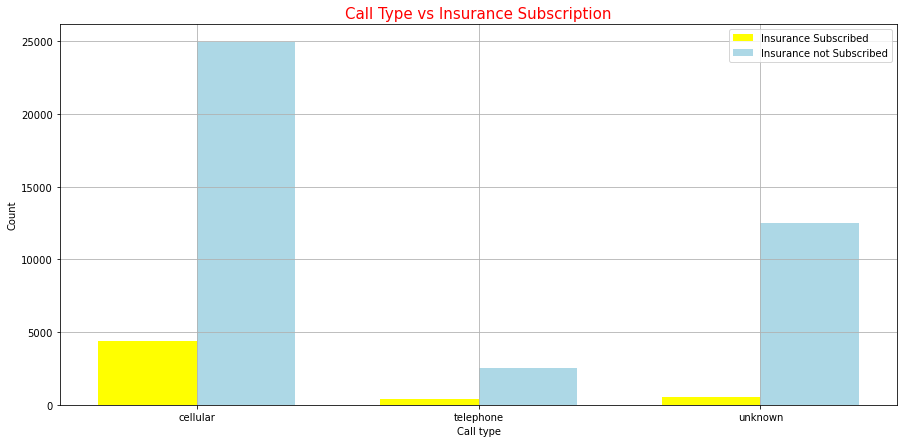

In [18]:
bar_width = 0.35
bar_positions1 = np.arange(len(call_yes))
bar_positions2 = bar_positions1 + bar_width

fig, ax = plt.subplots(figsize = (15,7))
ax.bar(bar_positions1, call_yes['age'], width = bar_width, label='Insurance Subscribed', color = 'yellow')
ax.bar(bar_positions2, call_no['age'], width = bar_width, label='Insurance not Subscribed', color = 'lightblue')
ax.set_xticks(bar_positions1 + bar_width / 2)
ax.set_xticklabels(call_yes.index)
ax.set_title('Call Type vs Insurance Subscription', color = 'r', fontsize = 15)
ax.set_xlabel('Call type')
ax.set_ylabel('Count')
ax.grid()
ax.legend()


plt.show()

In [19]:
day_yes = df_yes.groupby('day').count()
day_no = df_no.groupby('day').count()

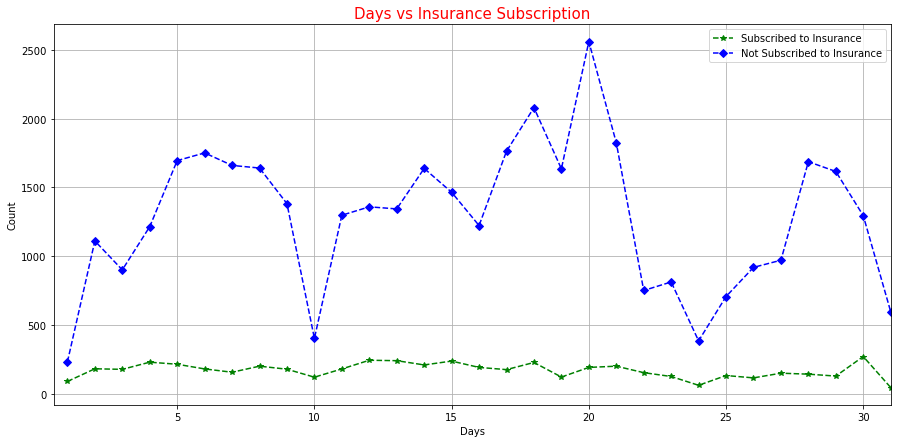

In [20]:
plt.figure(figsize = (15,7))

plt.plot(day_yes.index, day_yes['age'], 'g*--', label = 'Subscribed to Insurance')
plt.plot(day_no.index, day_no['age'], 'bD--', label = 'Not Subscribed to Insurance')
plt.title('Days vs Insurance Subscription', color = 'r', fontsize = 15)
plt.xlabel('Days')
plt.ylabel('Count')
plt.legend()
plt.grid()
plt.xlim(0.5,31)

plt.show()

In [21]:
mon_yes = df_yes.groupby('mon').count()
mon_no = df_no.groupby('mon').count()

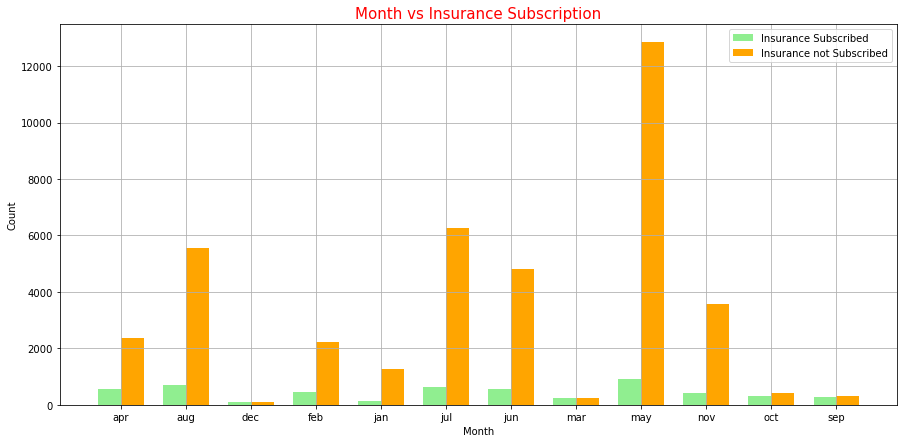

In [22]:
bar_width = 0.35
bar_positions1 = np.arange(len(mon_yes))
bar_positions2 = bar_positions1 + bar_width

fig, ax = plt.subplots(figsize = (15,7))
ax.bar(bar_positions1, mon_yes['age'], width = bar_width, label='Insurance Subscribed', color = 'lightgreen')
ax.bar(bar_positions2, mon_no['age'], width = bar_width, label='Insurance not Subscribed', color = 'orange')
ax.set_xticks(bar_positions1 + bar_width / 2)
ax.set_xticklabels(mon_yes.index)
ax.set_title('Month vs Insurance Subscription', color = 'r', fontsize = 15)
ax.set_xlabel('Month')
ax.set_ylabel('Count')
ax.grid()
ax.legend()


plt.show()

In [23]:
df['num_calls'].max()

63

In [24]:
call_yes = df_yes.groupby('num_calls').count()
call_no = df_no.groupby('num_calls').count()

(0.5, 20.0)

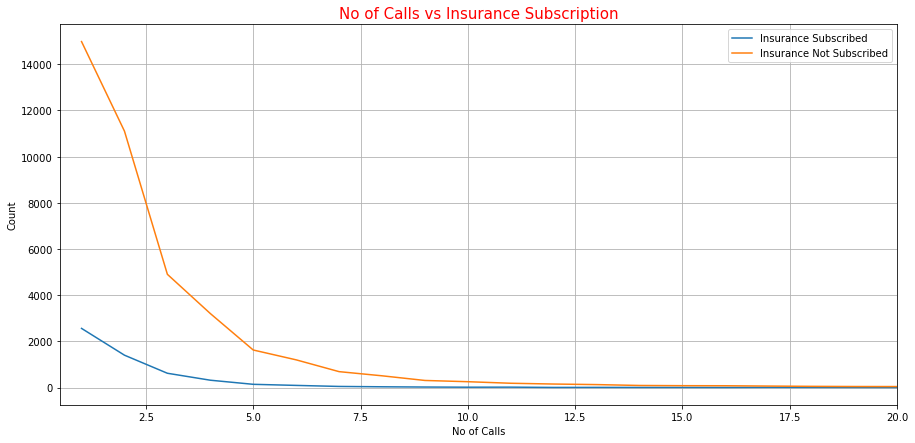

In [25]:
plt.figure(figsize = (15,7))

plt.plot(call_yes.index, call_yes['age'], label = 'Insurance Subscribed')
plt.plot(call_no.index, call_no['age'], label = 'Insurance Not Subscribed')
plt.title('No of Calls vs Insurance Subscription', color = 'r', fontsize = 15)
plt.xlabel('No of Calls')
plt.ylabel('Count')
plt.legend()
plt.grid()

plt.xlim(0.5, 20)

In [26]:
prev_yes = df_yes.groupby('prev_outcome').count()
prev_no = df_no.groupby('prev_outcome').count()

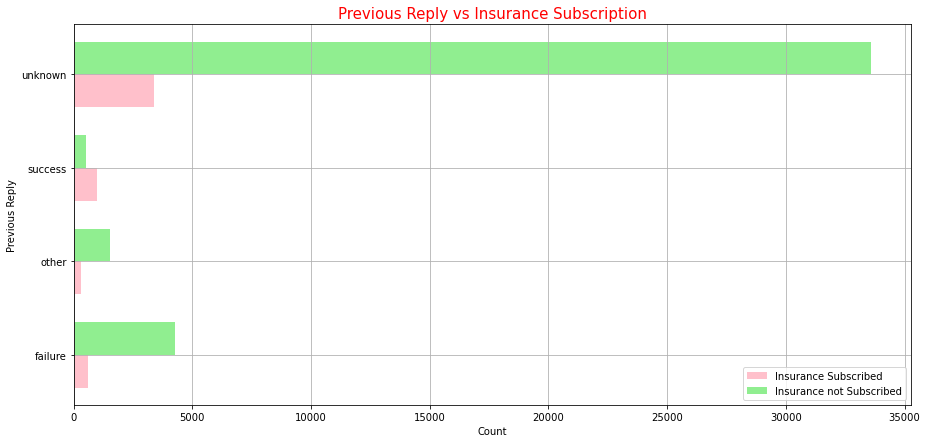

In [27]:
bar_width = 0.35
bar_positions1 = np.arange(len(prev_yes))
bar_positions2 = bar_positions1 + bar_width

fig, ax = plt.subplots(figsize = (15,7))
ax.barh(bar_positions1, prev_yes['age'], height = bar_width, label='Insurance Subscribed', color = 'pink')
ax.barh(bar_positions2, prev_no['age'], height = bar_width, label='Insurance not Subscribed', color = 'lightgreen')
ax.set_yticks(bar_positions1 + bar_width / 2)
ax.set_yticklabels(prev_yes.index)
ax.set_title('Previous Reply vs Insurance Subscription', color = 'r', fontsize = 15)
ax.set_ylabel('Previous Reply')
ax.set_xlabel('Count')
ax.grid()
ax.legend()


plt.show()

### As we don't have any Nan values, i have label encoding the Job

In [28]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [29]:
# Instead of using LabelEncoder from sklearn i'm using an function to encode the job.
def jobencode(job):
    if job == 'management':
        return 1
    elif job == 'technician':
        return 2
    elif job == 'entrepreneur':
        return 3
    elif job == 'blue-collar':
        return 4
    elif job == 'unknown':
        return 5
    elif job == 'retired':
        return 6
    elif job == 'admin.':
        return 7
    elif job == 'services':
        return 8
    elif job == 'self-employed':
        return 9
    elif job == 'unemployed':
        return 10
    elif job == 'housemaid':
        return 11
    elif job == 'student':
        return 12
    else:
        return 0

In [30]:
df['job'] = df['job'].apply(jobencode)
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,1,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,2,single,secondary,unknown,5,may,151,1,unknown,no
2,33,3,married,secondary,unknown,5,may,76,1,unknown,no
3,47,4,married,unknown,unknown,5,may,92,1,unknown,no
4,33,5,single,unknown,unknown,5,may,198,1,unknown,no


### Encoding Marital staus same as job

In [31]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [32]:
df['marital'] = df['marital'].apply(lambda x : 0 if x == 'single' else (1 if x == 'married' else 2))
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,1,1,tertiary,unknown,5,may,261,1,unknown,no
1,44,2,0,secondary,unknown,5,may,151,1,unknown,no
2,33,3,1,secondary,unknown,5,may,76,1,unknown,no
3,47,4,1,unknown,unknown,5,may,92,1,unknown,no
4,33,5,0,unknown,unknown,5,may,198,1,unknown,no


### Encoding educational_qualification

In [33]:
df['education_qual'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [34]:
df['education_qual'] = df['education_qual'].apply(lambda x : 0 if x == 'unknown' else (1 if x == 'primary' else (2 if x == 'secondary' else 3)))
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,1,1,3,unknown,5,may,261,1,unknown,no
1,44,2,0,2,unknown,5,may,151,1,unknown,no
2,33,3,1,2,unknown,5,may,76,1,unknown,no
3,47,4,1,0,unknown,5,may,92,1,unknown,no
4,33,5,0,0,unknown,5,may,198,1,unknown,no


### Encoding call type

In [35]:
df['call_type'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [36]:
df['call_type'] = df['call_type'].apply(lambda x : 0 if x == 'unknown' else (1 if x == 'cellular' else 2))
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,1,1,3,0,5,may,261,1,unknown,no
1,44,2,0,2,0,5,may,151,1,unknown,no
2,33,3,1,2,0,5,may,76,1,unknown,no
3,47,4,1,0,0,5,may,92,1,unknown,no
4,33,5,0,0,0,5,may,198,1,unknown,no


### we can't encode days as it's already integers & encoding the Month

In [37]:
def monthencode(month):
    mon = str(month[ : 3]).lower()
    if mon == 'jan':
        return 1
    elif mon == 'feb':
        return 2
    elif mon == 'mar':
        return 3
    elif mon == 'apr':
        return 4
    elif mon == 'may':
        return 5
    elif mon == 'jun':
        return 6
    elif mon == 'jul':
        return 7
    elif mon == 'aug':
        return 8
    elif mon == 'sep':
        return 9
    elif mon == 'oct':
        return 10
    elif mon == 'nov':
        return 11
    elif mon == 'dec':
        return 12
    else:
        return 0

In [38]:
df['mon'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [39]:
df['mon'] = df['mon'].apply(monthencode)
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,1,1,3,0,5,5,261,1,unknown,no
1,44,2,0,2,0,5,5,151,1,unknown,no
2,33,3,1,2,0,5,5,76,1,unknown,no
3,47,4,1,0,0,5,5,92,1,unknown,no
4,33,5,0,0,0,5,5,198,1,unknown,no


### Converting the duration into Hours for allign the values from 0 to 1

In [40]:
df['dur'] = df['dur'].apply(lambda x : (x/60)/60)
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,1,1,3,0,5,5,0.072500,1,unknown,no
1,44,2,0,2,0,5,5,0.041944,1,unknown,no
2,33,3,1,2,0,5,5,0.021111,1,unknown,no
3,47,4,1,0,0,5,5,0.025556,1,unknown,no
4,33,5,0,0,0,5,5,0.055000,1,unknown,no


### Encoding the previous outcomes

In [41]:
df['prev_outcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [42]:
df['prev_outcome'] = df['prev_outcome'].apply(lambda x : 0 if x == 'failure' else (1 if x == 'success' else (2 if x == 'other' else 3)))
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,1,1,3,0,5,5,0.072500,1,3,no
1,44,2,0,2,0,5,5,0.041944,1,3,no
2,33,3,1,2,0,5,5,0.021111,1,3,no
3,47,4,1,0,0,5,5,0.025556,1,3,no
4,33,5,0,0,0,5,5,0.055000,1,3,no


### Encoding the output variable Y

In [43]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [44]:
df['y'] = df['y'].apply(lambda x : 1 if x == 'yes' else 0)
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,1,1,3,0,5,5,0.072500,1,3,0
1,44,2,0,2,0,5,5,0.041944,1,3,0
2,33,3,1,2,0,5,5,0.021111,1,3,0
3,47,4,1,0,0,5,5,0.025556,1,3,0
4,33,5,0,0,0,5,5,0.055000,1,3,0


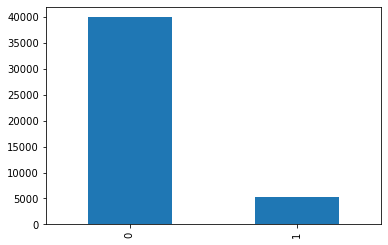

In [45]:
df['y'].value_counts().plot(kind = 'bar')
plt.show()

### From the above diagram, there are no too much No values so balancing the data by Oversampling
### Separating X & Y

In [46]:
x = df.iloc[ : , : -1].values
y = df.iloc[: , -1].values

In [47]:
print(Counter(y))

Counter({0: 39922, 1: 5289})


In [48]:
ros = RandomOverSampler()

In [49]:
x , y = ros.fit_resample(x, y)

In [50]:
print(Counter(y))

Counter({0: 39922, 1: 39922})


## Model Selection

In [51]:
logistic = LogisticRegression(max_iter = 10000)
naives = GaussianNB()
tree = DecisionTreeClassifier(random_state = 0)
random_forest = RandomForestClassifier(n_estimators = 5)

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.3)

In [53]:
logistic.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [54]:
logistic.score(x_test, y_test)

0.7576605159889789

In [55]:
naives.fit(x_train, y_train)

GaussianNB()

In [56]:
naives.score(x_test, y_test)

0.7589129164231444

In [57]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [58]:
tree.score(x_test, y_test)

0.9565417049344577

In [59]:
random_forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=5)

In [60]:
random_forest.score(x_test, y_test)

0.9556650246305419

## Validating the Models using AUC ROC

In [61]:
r_prob = list(0 for _ in range(len(y_test)))
log_prob = logistic.predict_proba(x_test)[:, 1]
nb_prob = naives.predict_proba(x_test)[:, 1]
dt_prob = tree.predict_proba(x_test)[:, 1]
rf_prob = random_forest.predict_proba(x_test)[:, 1]

In [62]:
roc_score = roc_auc_score(y_test, r_prob)
log_roc_score = roc_auc_score(y_test, log_prob)
naive_roc_score = roc_auc_score(y_test, nb_prob)
dt_roc_score = roc_auc_score(y_test, dt_prob)
rf_roc_score = roc_auc_score(y_test, rf_prob)

In [63]:
print('Random AUROC Prediction Score : %.3f' % roc_score)
print('Logistic Regression AUROC Score : %.3f' % log_roc_score)
print('Naives Bayes AUROC Prediction Score : %.3f' % naive_roc_score)
print('Decision Tree AUROC Prediction Score : %.3f' % dt_roc_score)
print('Random forest AUROC Prediction Score : %.3f' % rf_roc_score)

Random AUROC Prediction Score : 0.500
Logistic Regression AUROC Score : 0.848
Naives Bayes AUROC Prediction Score : 0.826
Decision Tree AUROC Prediction Score : 0.956
Random forest AUROC Prediction Score : 0.992


In [64]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_prob)
log_fpr, log_tpr, _ = roc_curve(y_test, log_prob)
naive_fpr, naive_tpr, _ = roc_curve(y_test, nb_prob)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_prob)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_prob)

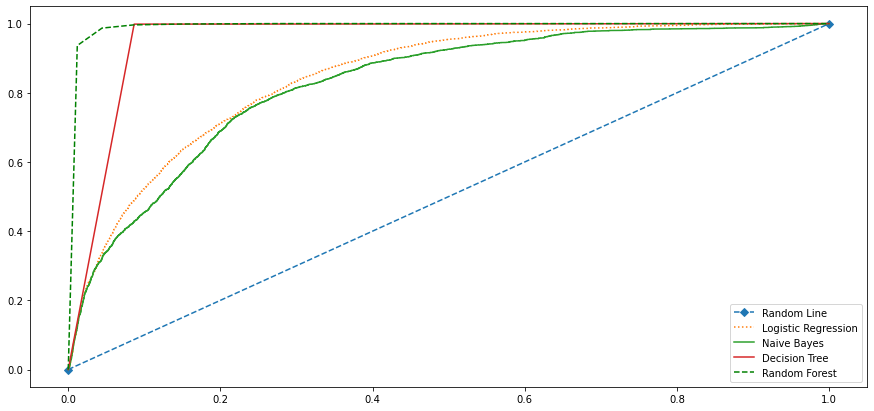

In [65]:
plt.figure(figsize = (15,7))

plt.plot(r_fpr, r_tpr,  'D--', label = 'Random Line')
plt.plot(log_fpr, log_tpr,':', label = 'Logistic Regression')
plt.plot(naive_fpr, naive_tpr, label = 'Naive Bayes')
plt.plot(dt_fpr, dt_tpr, label = 'Decision Tree')
plt.plot(rf_fpr, rf_tpr, 'g--', label = 'Random Forest')
plt.legend()

plt.show()

## From the Above AUC ROC, Random Forest is having higher probablity, so using that model for this Customer Conversion prediction dataset

In [66]:
models = [LogisticRegression(max_iter = 10000),GaussianNB(),DecisionTreeClassifier(random_state = 0),RandomForestClassifier(n_estimators = 5)]
scores = []
for i in models:
    scores.append(np.average(cross_val_score(i, x, y, cv = 5)))
print(scores)

[0.7269163161942898, 0.7022433455739835, 0.7846779091089688, 0.7850034984490868]


## From the CV score Random Forest is giving better score than other Models

In [67]:
y_pred = tree.predict(x_test)

In [68]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10768  1021]
 [   20 12145]]


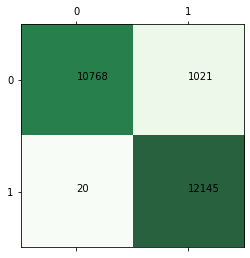

In [69]:
plt.matshow(cm, cmap = 'Greens', alpha = 0.85)

for i in range(2):
    for j in range(2):
        plt.text(x = j, y = i, s = cm[i,j])

plt.show()

In [70]:
acc_score = accuracy_score(y_test, y_pred)
print('Accurancy Score is %0.2f'% (acc_score *100), '%')

Accurancy Score is 95.65 %
